In [1]:
# Core
import pandas as pd
import numpy as np 
import seaborn as sns
import random
import matplotlib.pyplot as plt
# To allow interactive plot.
from ipywidgets import *
from IPython.display import display


# Hygiene
from tqdm import tqdm
import time
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

In [2]:
df = pd.read_csv('UCI_Credit_Card.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [3]:
df.isnull().values.any()

False

In [4]:
for col in df.columns:
    print(col)

ID
LIMIT_BAL
SEX
EDUCATION
MARRIAGE
AGE
PAY_0
PAY_2
PAY_3
PAY_4
PAY_5
PAY_6
BILL_AMT1
BILL_AMT2
BILL_AMT3
BILL_AMT4
BILL_AMT5
BILL_AMT6
PAY_AMT1
PAY_AMT2
PAY_AMT3
PAY_AMT4
PAY_AMT5
PAY_AMT6
default.payment.next.month


Dataset Information
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

Content
There are 25 variables:

ID: ID of each client <br>
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit <br>
SEX: Gender (1=male, 2=female) <br>
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) <br>
MARRIAGE: Marital status (1=married, 2=single, 3=others) <br>
AGE: Age in years <br>
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above) <br>
<br>
-2=No consumption,-1=Paid in full,0=Revolving credit,1=delay 1,2=delay 2,3=delay 3,4=delay 4,5=delay 5,6=delay 6,7=delay 7,8=delay 8,9=delay 9 or more <br>
<br>
PAY_2: Repayment status in August, 2005 (scale same as above) <br>
PAY_3: Repayment status in July, 2005 (scale same as above) <br>
PAY_4: Repayment status in June, 2005 (scale same as above) <br>
PAY_5: Repayment status in May, 2005 (scale same as above) <br>
PAY_6: Repayment status in April, 2005 (scale same as above) <br>
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar) <br>
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar) <br>
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar) <br>
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar) <br>
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar) <br>
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar) <br>
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar) <br>
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar) <br>
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar) <br>
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar) <br>
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar) <br>
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar) <br>
default.payment.next.month: Default payment (1=yes, 0=no)

Inspiration
Some ideas for exploration:

How does the probability of default payment vary by categories of different demographic variables? <br>
Which variables are the strongest predictors of default payment?

<AxesSubplot:>

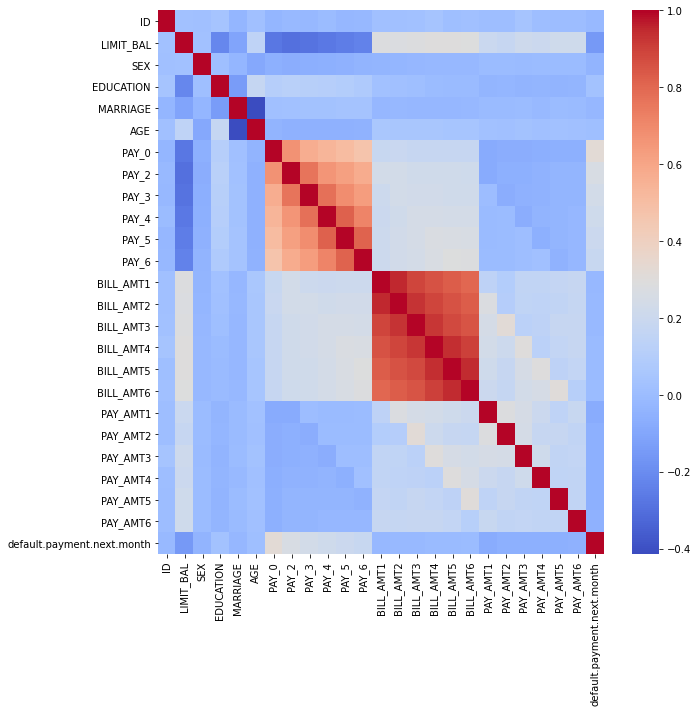

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='coolwarm')

# LIMIT_BAL

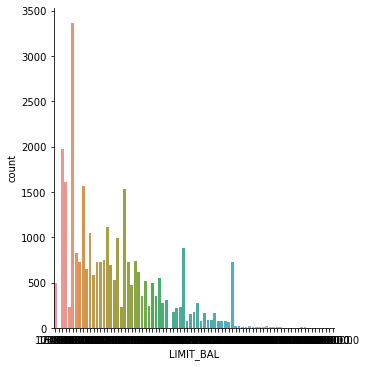

In [6]:
sns.catplot(x = "LIMIT_BAL", kind = "count", data = df)

In [7]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [8]:
def LIMIT_BAL(x):
    if x['LIMIT_BAL'] <= 50000:
        return '0 - 50k'
    elif x['LIMIT_BAL'] > 50000 and x['LIMIT_BAL'] <= 140000:
        return '>50k - 140k'
    elif x['LIMIT_BAL'] > 140000 and x['LIMIT_BAL'] <= 240000:
        return '>140k - 240k'
    elif x['LIMIT_BAL'] > 240000:
        return '>240k'

df['LIMIT_BAL_DER'] = df.apply(LIMIT_BAL, axis=1)

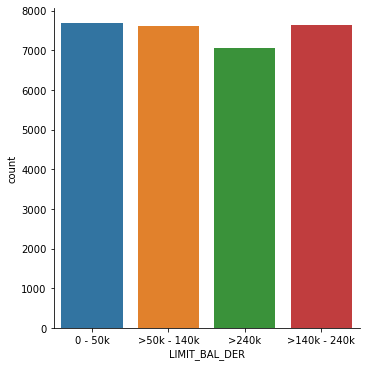

In [9]:
sns.catplot(x = "LIMIT_BAL_DER", kind = "count", data = df)

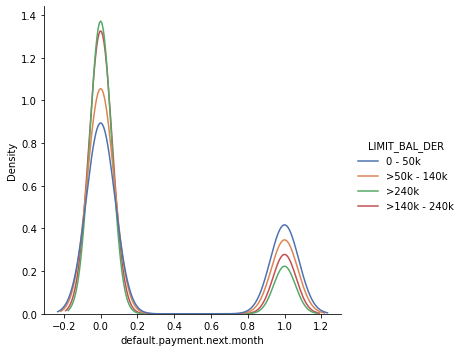

In [10]:
sns.displot(df, x= 'default.payment.next.month', kind='kde', hue='LIMIT_BAL_DER', palette='deep')

# SEX

array([[<AxesSubplot:title={'center':'SEX'}>]], dtype=object)

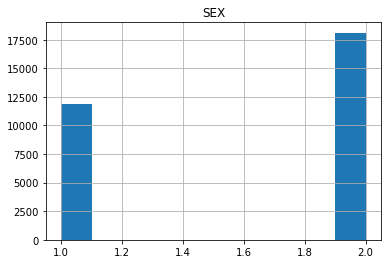

In [23]:
df.hist(column='SEX')

In [21]:
def SEX(x):
    if x['SEX'] == 1:
        return 'MALE'
    elif x['SEX'] == 2:
        return 'FEMALE'
    
df['SEX_DER'] = df.apply(SEX, axis=1)

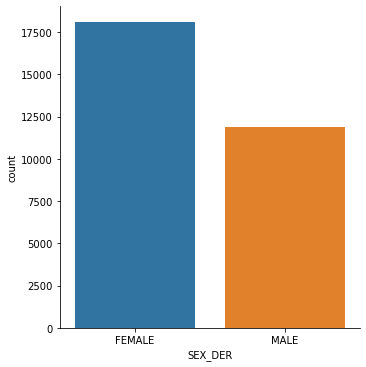

In [22]:
sns.catplot(x = "SEX_DER", kind = "count", data = df)

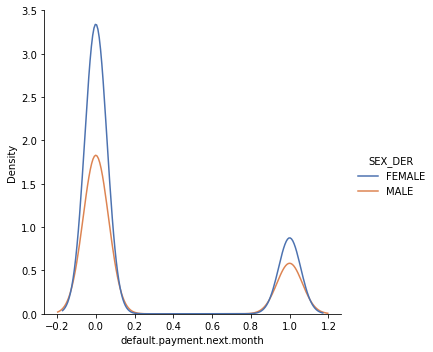

In [23]:
sns.displot(df, x= 'default.payment.next.month', kind='kde', hue='SEX_DER', palette='deep')

# EDUCATION

In [11]:
# 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown

def EDU(x):
    if x['EDUCATION'] == 1:
        return 'graduate school'
    elif x['EDUCATION'] == 2:
        return 'university'
    elif x['EDUCATION'] == 3:
        return 'high school'
    elif x['EDUCATION'] == 4:
        return 'others'
    else:
        return 'unknown'

df['EDUCATION_DER'] = df.apply(EDU, axis=1)

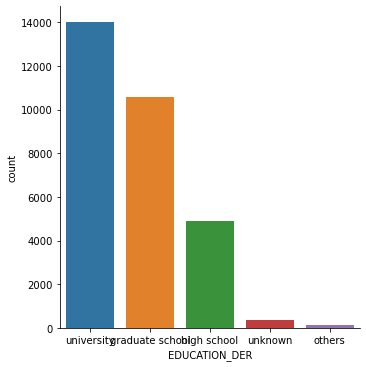

In [12]:
sns.catplot(x = "EDUCATION_DER", kind = "count", data = df)

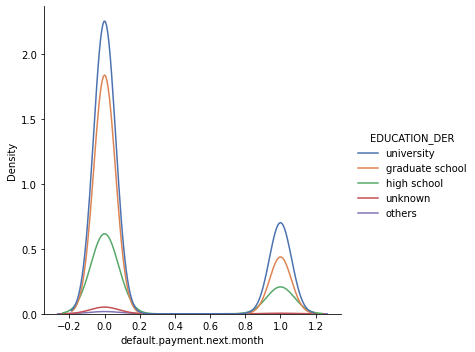

In [13]:
sns.displot(df, x= 'default.payment.next.month', kind='kde', hue='EDUCATION_DER', palette='deep')

# MARRAIGE

In [24]:
df['MARRIAGE'].describe()

count    30000.000000
mean         1.551867
std          0.521970
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: MARRIAGE, dtype: float64

array([[<AxesSubplot:title={'center':'MARRIAGE'}>]], dtype=object)

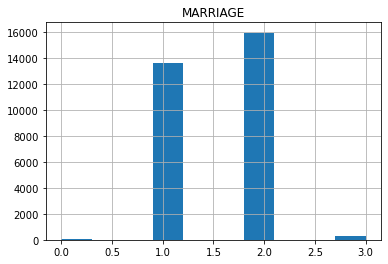

In [24]:
df.hist(column='MARRIAGE')

In [25]:
def MARRIAGE(x):
    if x['MARRIAGE'] == 1:
        return 'MARRIED'
    elif x['MARRIAGE'] == 2:
        return 'SINGLE'
    else:
        return 'OTHERS' # JOIN 0, 3
    
df['MARRIAGE_DER'] = df.apply(MARRIAGE, axis=1)

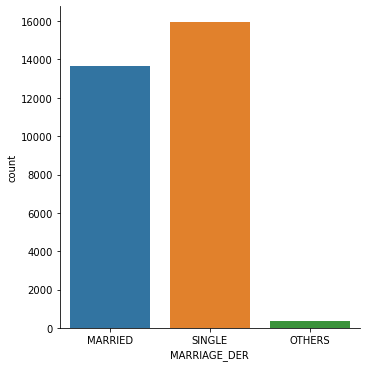

In [26]:
sns.catplot(x = "MARRIAGE_DER", kind = "count", data = df)

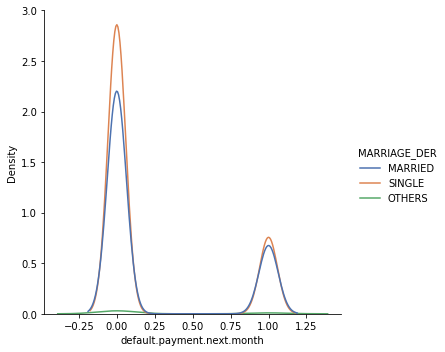

In [27]:
sns.displot(df, x= 'default.payment.next.month', kind='kde', hue='MARRIAGE_DER', palette='deep')

# AGE

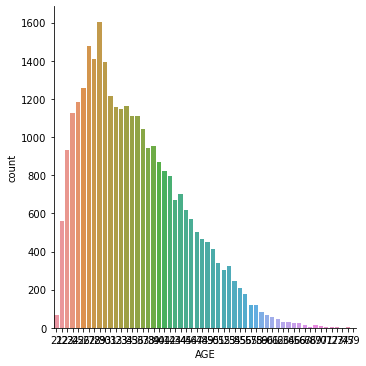

In [14]:
sns.catplot(x = "AGE", kind = "count", data = df)

In [15]:
df['AGE'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [16]:
def AGE(x):
    if x['AGE'] <= 28:
        return '<=28'
    elif x['AGE'] > 28 and x['AGE'] <= 34:
        return '29 - 34'
    elif x['AGE'] > 34 and x['AGE'] <= 41:
        return '35 - 41'
    elif x['AGE'] > 41:
        return '>41'
    
df['AGE_DER'] = df.apply(AGE, axis=1)

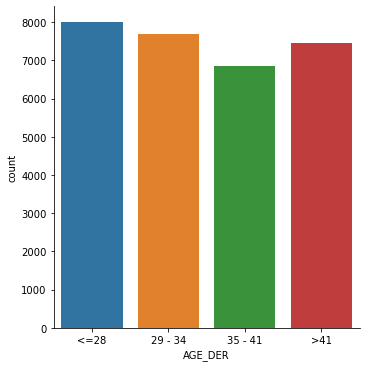

In [17]:
sns.catplot(x = "AGE_DER", kind = "count", data = df)

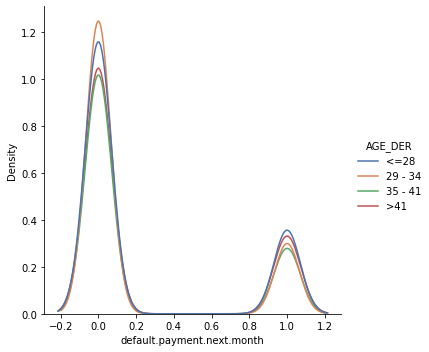

In [18]:
sns.displot(df, x= 'default.payment.next.month', kind='kde', hue='AGE_DER', palette='deep')

# PAY_i

In [28]:
df_PAY = df.iloc[:, 6:12]

df_PAY_default = pd.concat([df_PAY, df['default.payment.next.month']], axis=1)
df_PAY_default

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month
0,2,2,-1,-1,-2,-2,1
1,-1,2,0,0,0,2,1
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,-1,0,-1,0,0,0,0
...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0
29996,-1,-1,-1,-1,0,0,0
29997,4,3,2,-1,0,0,1
29998,1,-1,0,0,0,-1,1


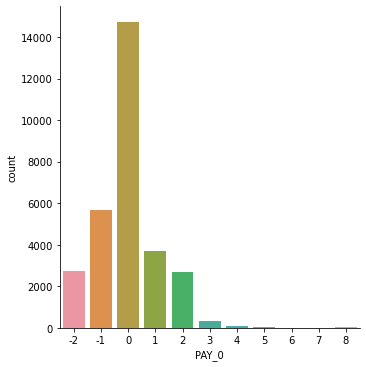

In [25]:
sns.catplot(x = "PAY_0", kind = "count", data = df)

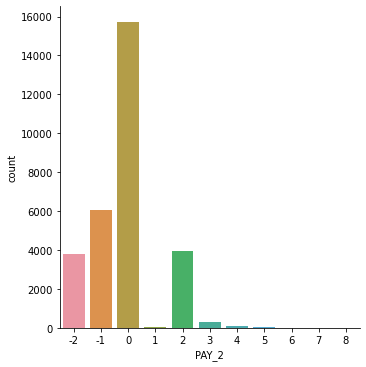

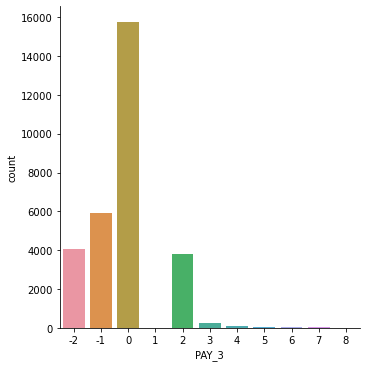

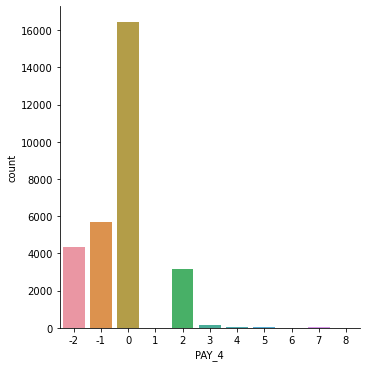

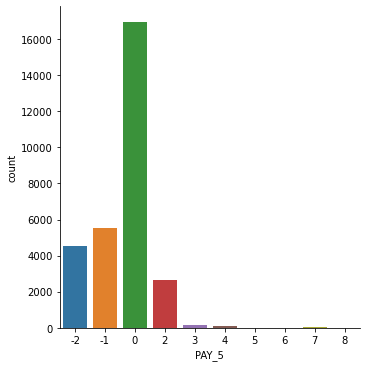

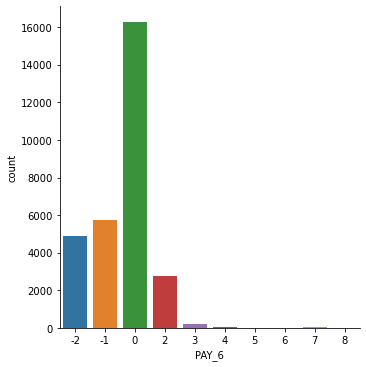

In [26]:
sns.catplot(x = "PAY_2", kind = "count", data = df)
sns.catplot(x = "PAY_3", kind = "count", data = df)
sns.catplot(x = "PAY_4", kind = "count", data = df)
sns.catplot(x = "PAY_5", kind = "count", data = df)
sns.catplot(x = "PAY_6", kind = "count", data = df)

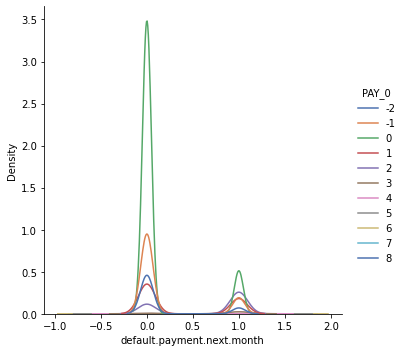

In [27]:
sns.displot(df, x= 'default.payment.next.month', kind='kde', hue='PAY_0', palette='deep')

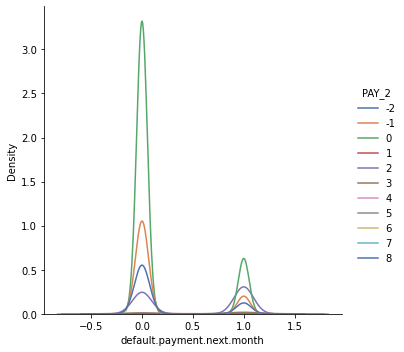

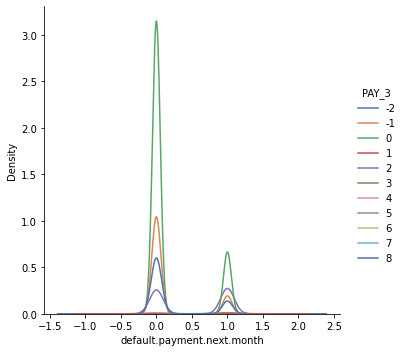

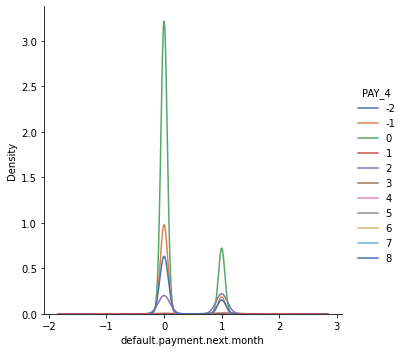

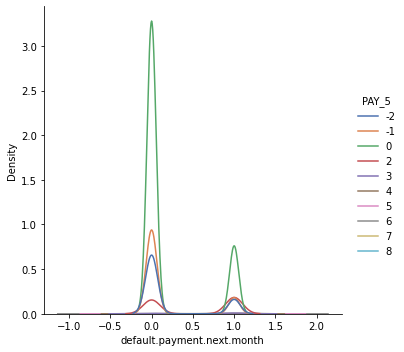

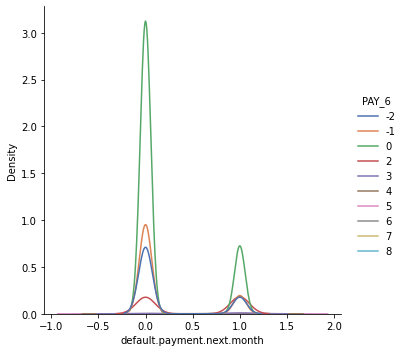

In [28]:
sns.displot(df, x= 'default.payment.next.month', kind='kde', hue='PAY_2', palette='deep')
sns.displot(df, x= 'default.payment.next.month', kind='kde', hue='PAY_3', palette='deep')
sns.displot(df, x= 'default.payment.next.month', kind='kde', hue='PAY_4', palette='deep')
sns.displot(df, x= 'default.payment.next.month', kind='kde', hue='PAY_5', palette='deep')
sns.displot(df, x= 'default.payment.next.month', kind='kde', hue='PAY_6', palette='deep')